In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import random


In [2]:
def random_color():
    # Generating a random rgb value
    r, g, b = list(np.random.choice(range(256), size=3))

    # Convert to hex
    return "#{:X}{:X}{:X}".format(r, g, b)

More info about the crystal shapes [here](https://bionerdnotes.wordpress.com/2020/05/26/the-7-crystal-systems-miller-indices-and-the-14-bravais-lattices/).

I use the following shape basics:

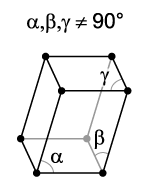

In [11]:
# Side lengths
a = 1
b = 1
c = 1

# Angles
alpha = np.deg2rad(90)
beta = np.deg2rad(90)
gamma = np.deg2rad(120)

# Calculate node coordinates
A = [0,0,0]
B = [b * np.cos(alpha), b * np.sin(alpha), 0]
C = [a + b * np.cos(alpha), b * np.sin(alpha), 0]
D = [a,0,0]
E = [c * np.cos(gamma), c * np.cos(beta), c * np.sin(beta) * np.sin(gamma)]
F = [b * np.cos(alpha) + c * np.cos(gamma), (b + c * np.cos(beta)) * np.sin(alpha), c * np.sin(beta) * np.sin(gamma)]
G = [a + b * np.cos(alpha) + c * np.cos(gamma), (b + c * np.cos(beta)) * np.sin (alpha), c * np.sin(beta) * np.sin(gamma)]
H = [a + c * np.cos(gamma), c * np.cos(beta), c * np.sin(beta) * np.sin(gamma)]


In [12]:
# Plot image
fig = go.Figure(data=[])
for nx in range(10):
    for ny in range(2):
        for nz in range(2):
            fig.add_trace(
                go.Mesh3d(
                    # 8 vertices of a cube
                    x=[A[0] + nx*a + ny*F[0] - ny*E[0], B[0] + nx*a + ny*F[0] - ny*E[0], C[0] + nx*a + ny*F[0] - ny*E[0], D[0] + nx*a + ny*F[0] - ny*E[0], E[0] + nx*a + ny*F[0] - ny*E[0], F[0] + nx*a + ny*F[0] - ny*E[0], G[0] + nx*a + ny*F[0] - ny*E[0], H[0] + nx*a + ny*F[0] - ny*E[0]],
                    y=[A[1] + ny*b - ny*(b - F[1]) - ny*E[1], B[1] + ny*b - ny*(b - F[1]) - ny*E[1], C[1] + ny*b - ny*(b - F[1]) - ny*E[1], D[1] + ny*b - ny*(b - F[1]) - ny*E[1], E[1] + ny*b - ny*(b - F[1]) - ny*E[1], F[1] + ny*b - ny*(b - F[1]) - ny*E[1], G[1] + ny*b - ny*(b - F[1]) - ny*E[1], H[1] + ny*b - ny*(b - F[1]) - ny*E[1]],
                    z=[A[2] + nz*c, B[2] + nz*c, C[2] + nz*c, D[2] + nz*c, E[2] + nz*c, F[2] + nz*c, G[2] + nz*c, H[2] + nz*c],

                    i = [7, 0, 0, 0, 4, 4, 6, 1, 4, 0, 3, 6],
                    j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
                    k = [0, 7, 2, 3, 6, 7, 1, 6, 5, 5, 7, 2],
                    opacity=1,
                    # color=random_color(),
                    flatshading = True
                )
            )

            fig.add_trace(
                go.Scatter3d(
                    # 8 vertices of a cube
                    x=[A[0] + nx*a + ny*F[0] - ny*E[0], B[0] + nx*a + ny*F[0] - ny*E[0], C[0] + nx*a + ny*F[0] - ny*E[0], D[0] + nx*a + ny*F[0] - ny*E[0], E[0] + nx*a + ny*F[0] - ny*E[0], F[0] + nx*a + ny*F[0] - ny*E[0], G[0] + nx*a + ny*F[0] - ny*E[0], H[0] + nx*a + ny*F[0] - ny*E[0]],
                    y=[A[1] + ny*b - ny*(b - F[1]) - ny*E[1], B[1] + ny*b - ny*(b - F[1]) - ny*E[1], C[1] + ny*b - ny*(b - F[1]) - ny*E[1], D[1] + ny*b - ny*(b - F[1]) - ny*E[1], E[1] + ny*b - ny*(b - F[1]) - ny*E[1], F[1] + ny*b - ny*(b - F[1]) - ny*E[1], G[1] + ny*b - ny*(b - F[1]) - ny*E[1], H[1] + ny*b - ny*(b - F[1]) - ny*E[1]],
                    z=[A[2] + nz*c, B[2] + nz*c, C[2] + nz*c, D[2] + nz*c, E[2] + nz*c, F[2] + nz*c, G[2] + nz*c, H[2] + nz*c],

                    opacity=1,
                    marker=dict(color='black', size=2, line=dict(width=0, color="white"))
                )
            )

            fig.add_trace(
                go.Scatter3d(
                    # 8 vertices of a cube
                    x=[F[0]],
                    y=[F[1]],
                    z=[F[2]],

                    opacity=1,
                    marker=dict(color='blue', line=dict(width=0, color="white"))
                )
            )

            fig.add_trace(
                go.Scatter3d(
                    # 8 vertices of a cube
                    x=[E[0]],
                    y=[E[1]],
                    z=[E[2]],

                    opacity=1,
                    marker=dict(color='red', line=dict(width=0, color="white"))
                )
            )
# Fix aspect ratio
fig.update_scenes(aspectmode='data')

fig.show()